In [3]:
import pandas as pd

df = pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df[df['title'].str.contains('Toy Story')]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2355,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
7355,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX


In [5]:
genres = df['genres'].str.get_dummies()
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df_movies = pd.concat([df, genres], axis=1)
df_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_genres = scaler.fit_transform(genres)
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [8]:
dft = pd.DataFrame(scaled_genres)

In [9]:
dft.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
9737,-0.05918,2.080702,-0.385949,3.865793,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
9738,-0.05918,-0.480607,-0.385949,3.865793,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
9739,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
9740,-0.05918,2.080702,-0.385949,3.865793,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
9741,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065


In [10]:
genres.head(7)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [11]:
genres.sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [12]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(scaled_genres)
model.labels_

array([0, 0, 2, ..., 2, 0, 2], dtype=int32)

In [13]:
genres.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [14]:
#distancia de cada filme, cada genero do seu centroide (CLUSTER)
model.cluster_centers_

array([[-0.05917995,  0.44669627,  1.39977835,  1.53948999,  1.59256173,
         0.08011839, -0.31198992, -0.21014887, -0.68871824,  1.08775005,
        -0.09492563, -0.2655762 ,  0.53535368,  0.25978552, -0.14632284,
        -0.2943618 ,  0.49670387, -0.43925834, -0.17453174, -0.08508927],
       [-0.05917995,  0.48016957, -0.13897437, -0.2329242 , -0.26514171,
        -0.61434622,  0.6381984 , -0.2131938 , -0.04541451, -0.15338834,
         0.3033246 ,  0.56685311, -0.01893284, -0.18106515,  0.60119197,
        -0.31489263,  0.34322868,  1.59152871, -0.11239918, -0.06334032],
       [ 0.03398926, -0.26868224, -0.2464332 , -0.24201597, -0.24159555,
         0.20559937, -0.16507919,  0.12179958,  0.16247861, -0.17505356,
        -0.08977235, -0.14907057, -0.1066478 ,  0.01052189, -0.18679651,
         0.17650161, -0.22966939, -0.48350039,  0.07772861,  0.04099   ]])

In [15]:
df_groups = pd.DataFrame(model.cluster_centers_, columns=genres.columns)
df_groups.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.446696,1.399778,1.539490,1.592562,0.080118,-0.311990,-0.210149,-0.688718,1.087750,-0.094926,-0.265576,0.535354,0.259786,-0.146323,-0.294362,0.496704,-0.439258,-0.174532,-0.085089
1,-0.059180,0.480170,-0.138974,-0.232924,-0.265142,-0.614346,0.638198,-0.213194,-0.045415,-0.153388,0.303325,0.566853,-0.018933,-0.181065,0.601192,-0.314893,0.343229,1.591529,-0.112399,-0.063340
2,0.033989,-0.268682,-0.246433,-0.242016,-0.241596,0.205599,-0.165079,0.121800,0.162479,-0.175054,-0.089772,-0.149071,-0.106648,0.010522,-0.186797,0.176502,-0.229669,-0.483500,0.077729,0.040990


In [16]:
df_groups.transpose()

,0,1,2
(no genres listed),-0.059180,-0.059180,0.033989
Action,0.446696,0.480170,-0.268682
Adventure,1.399778,-0.138974,-0.246433
Animation,1.539490,-0.232924,-0.242016
Children,1.592562,-0.265142,-0.241596
Comedy,0.080118,-0.614346,0.205599
Crime,-0.311990,0.638198,-0.165079
Documentary,-0.210149,-0.213194,0.121800
Drama,-0.688718,-0.045415,0.162479
Fantasy,1.087750,-0.153388,-0.175054


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1915fa58>,
      dtype=object)

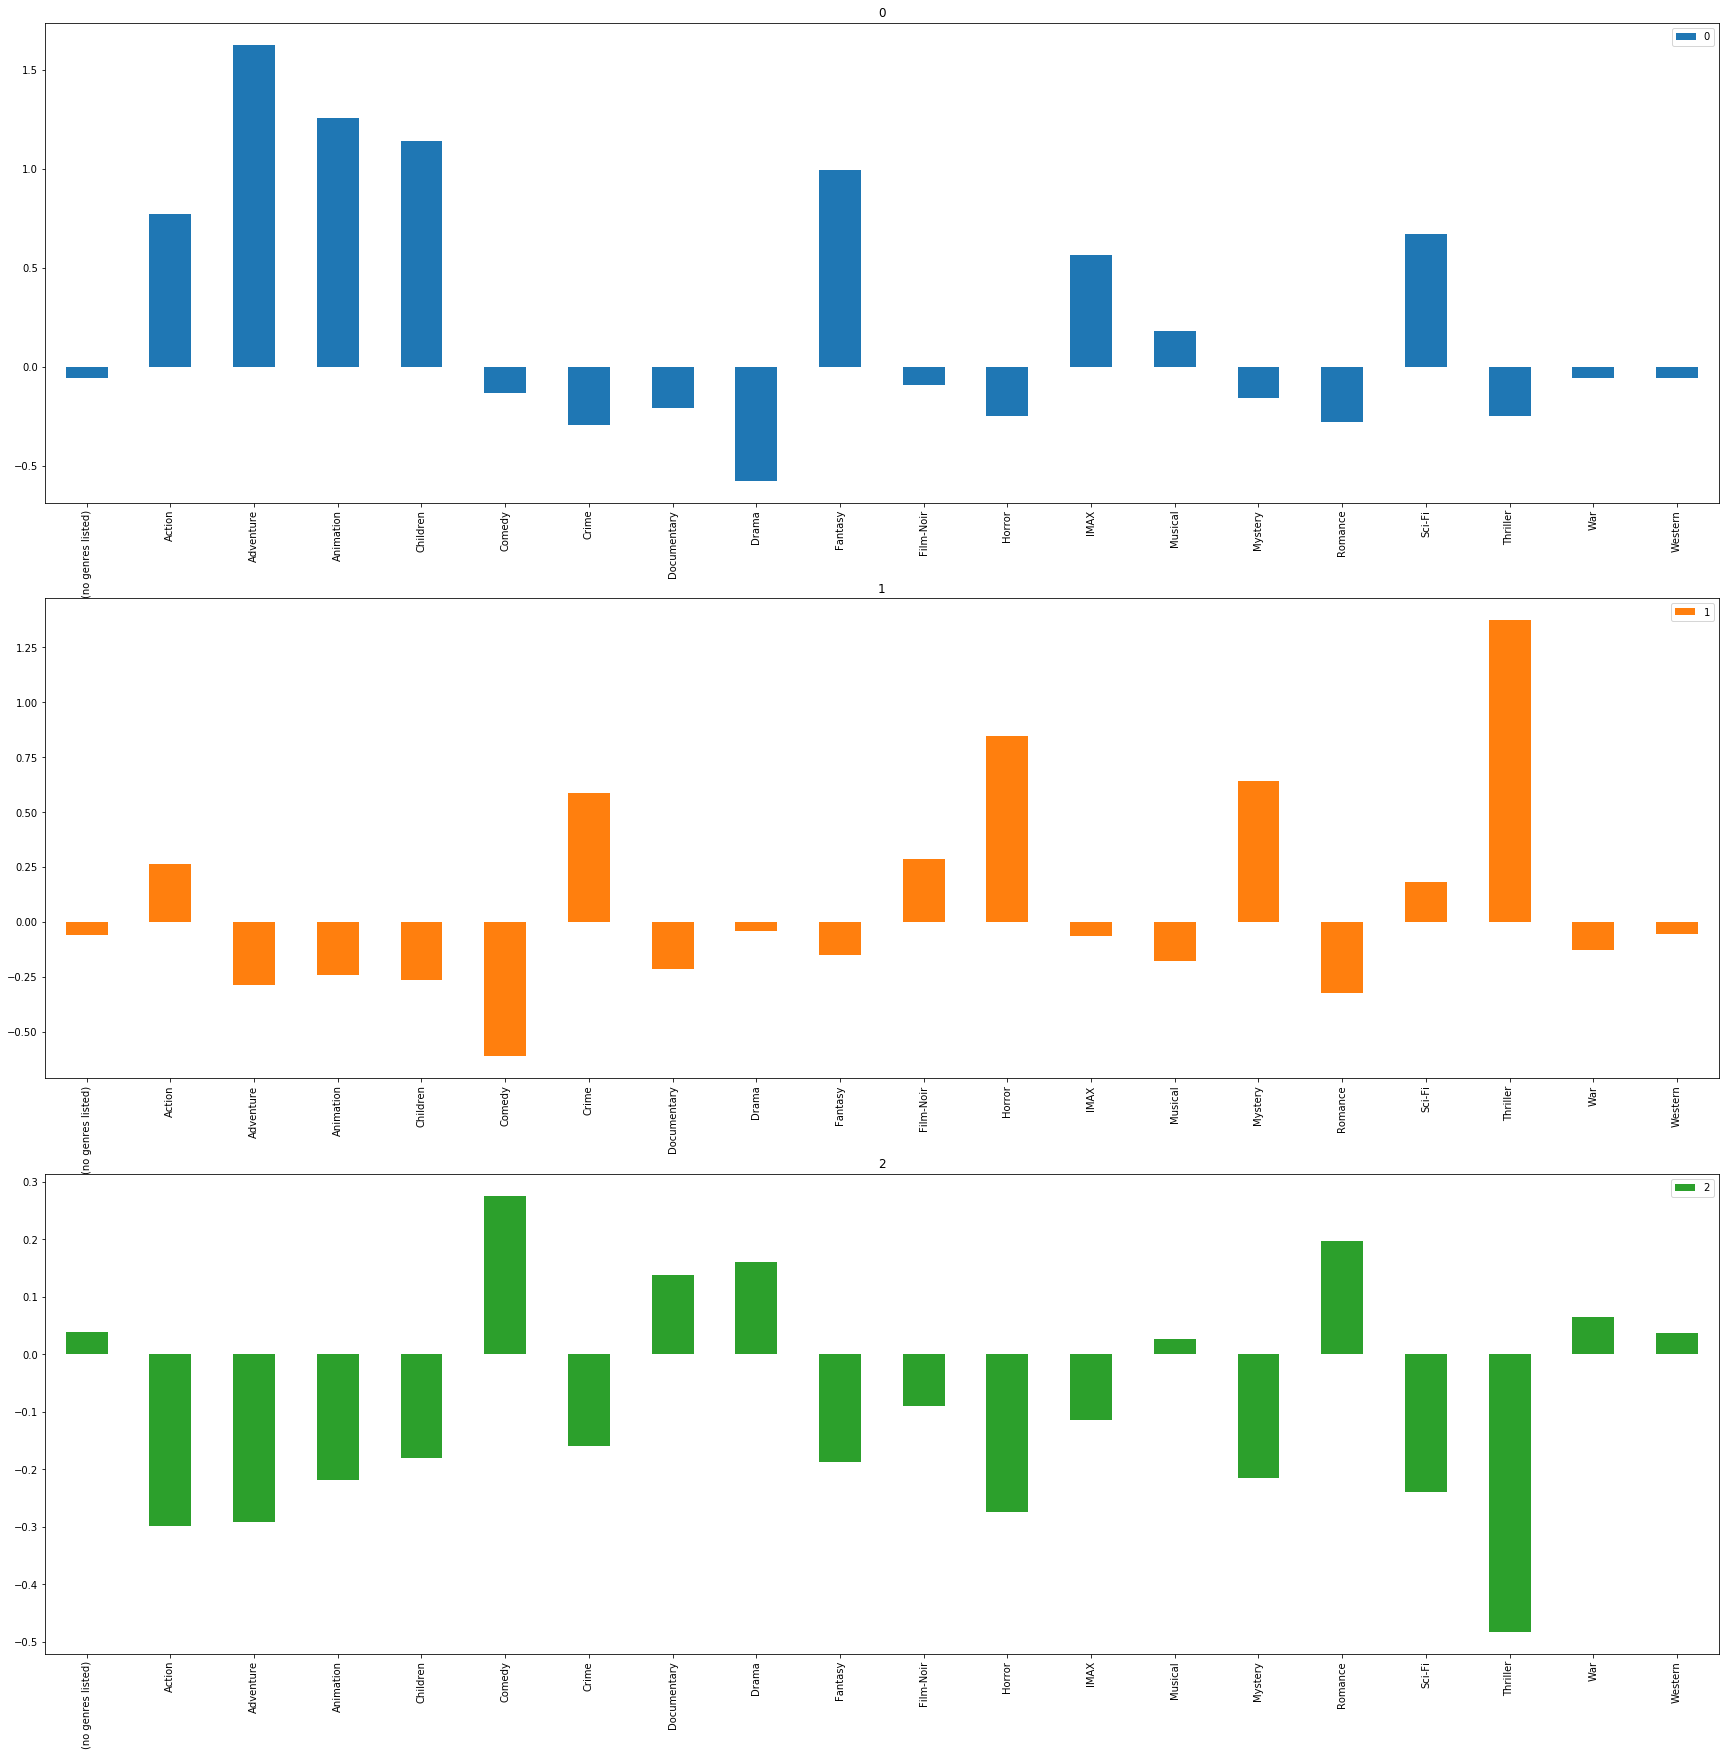

In [46]:
df_groups.transpose().plot.bar(subplots=True, figsize=(30,30), sharex=False)

In [17]:
df_movies[model.labels_ == 2]

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,9,Sudden Death (1995),Action,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
13,14,Nixon (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,15,Cutthroat Island (1995),Action|Adventure|Romance,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15,16,Casino (1995),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=20)
model.fit(scaled_genres)
model.labels_

array([ 2, 15,  7, ...,  0, 16, 12], dtype=int32)

In [19]:
df_groups = pd.DataFrame(model.cluster_centers_, columns=genres.columns)
df_groups.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.480607,-0.248851,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.969680,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.007316,-0.202020,-0.132065
1,-0.05918,0.208976,-0.304164,-0.258679,-0.248649,-0.521196,-0.341182,-0.217489,-0.701351,-0.193523,-0.094926,2.993517,-0.128397,-0.188419,-0.179928,-0.427788,2.990120,0.508372,-0.202020,-0.132065
2,-0.05918,-0.146991,1.315176,3.865793,3.697524,0.321475,-0.285105,-0.217489,-0.756600,0.774060,-0.094926,-0.320074,-0.128397,0.157951,-0.196412,-0.283702,-0.082998,-0.491259,-0.158725,-0.132065
3,-0.05918,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
4,-0.05918,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513


In [ ]:
df_groups.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False, rot=1)

In [24]:
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(scaled_genres)


In [21]:
visualizacao

array([[-29.115509 ,  31.07058  ],
       [ 23.584024 ,  30.284248 ],
       [ 10.52924  , -20.85354  ],
       ...,
       [-17.947596 ,   7.022492 ],
       [ -9.5443   , -21.1569   ],
       [ 27.175592 ,   3.1075947]], dtype=float32)

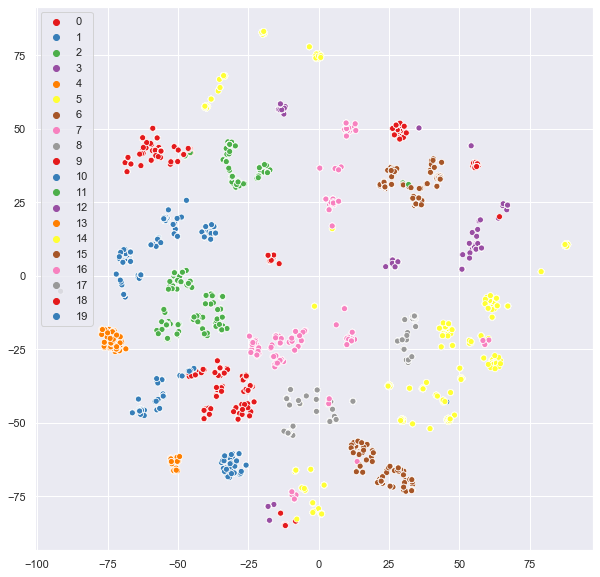

In [31]:
import seaborn as sns
sns.set(rc={'figure.figsize': (10,10)})

sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=model.labels_,
               palette=sns.color_palette('Set1',20))

In [36]:
from sklearn.cluster import KMeans

def get_kmeans(numero_clusters, genres):
    model = KMeans(n_clusters=numero_clusters)
    model.fit(genres)
    return [numero_clusters, model.inertia_]


In [33]:
get_kmeans(20, scaled_genres)

[20, 54474.65004415632]

In [34]:
get_kmeans(3, scaled_genres)

[3, 166139.5947743099]

In [35]:
get_kmeans(40, scaled_genres)

[40, 35562.65902600295]

In [41]:
''''
resultado = []

for numero_de_grupos in range(1,41):
    r = get_kmeans(numero_de_grupos, scaled_genres)
    resultado.append(r)
'''    
resultado = [get_kmeans(numero_de_grupos, scaled_genres) for numero_de_grupos in range(1,41)]

In [42]:
resultado = pd.DataFrame(resultado, columns=['groups', 'inertia'])

In [43]:
resultado.head()

,groups,inertia
0,1,194840.000000
1,2,179528.169277
2,3,167951.646467
3,4,156745.225816
4,5,147218.458155


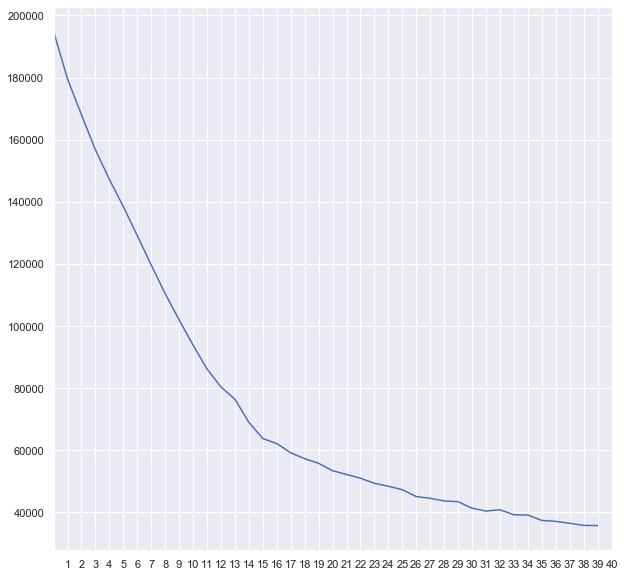

In [44]:
resultado['inertia'].plot(xticks=resultado['groups'])

In [45]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=15)
model.fit(scaled_genres)
model.labels_

array([4, 4, 7, ..., 3, 4, 0], dtype=int32)

In [53]:
df_movies[model.labels_ == 8 ]

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
95,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
168,199,"Umbrellas of Cherbourg, The (Parapluies de Che...",Drama|Musical|Romance,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
208,242,Farinelli: il castrato (1994),Drama|Musical,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
304,346,Backbeat (1993),Drama|Musical,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
415,477,What's Love Got to Do with It? (1993),Drama|Musical,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
481,549,Thirty-Two Short Films About Glenn Gould (1993),Drama|Musical,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
